In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import imread
from matplotlib.pyplot import figure
from itertools import combinations

# Loading all Q-Tables

In [3]:
drones = []
for i in range(4):
    with open(f'4L/ExperimentSim3R/crazyflie{i}QTable.pkl', 'rb') as f:
        crazy = pickle.load(f)
        drones.append(crazy)

        
        
dronesSub = []
for i in range(4):
    with open(f'Sub/ExperimentSim3R/crazyflie{i}QTable.pkl', 'rb') as f:
        crazy = pickle.load(f)
        dronesSub.append(crazy)

        
        
dronesGN = []
for i in range(4):
    with open(f'GN/ExperimentSim3R/crazyflie{i}QTable.pkl', 'rb') as f:
        crazy = pickle.load(f)
        dronesGN.append(crazy)
        
        

## Prep the labels

In [5]:
a = []
for i in range(1,9):
    combi = combinations(range(8),i)
    for j in list(combi):
        a.append(list(j))

## Simultaneous Q-Tables

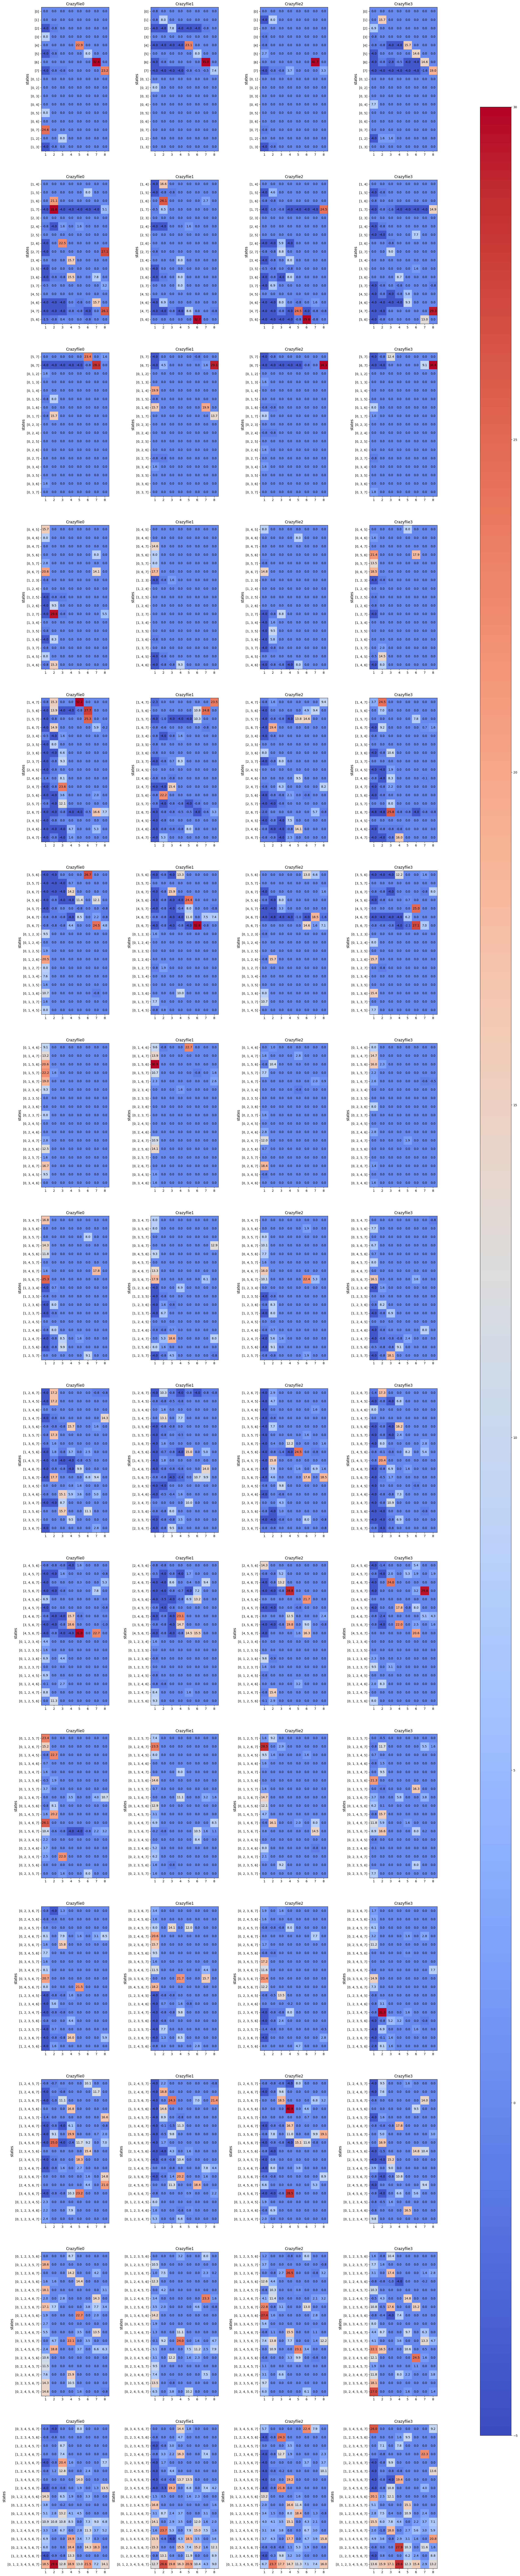

In [7]:

fig, axs = plt.subplots(15, 4, figsize=(28,150))
for j in range(len(drones)):
    table = drones[j][:]
    for i in range(15):
        t = table[17*i:(17*i)+17,:]
        # Plot the grid of Q-values
        
        m = axs[i,j].imshow(t, cmap='coolwarm', interpolation='nearest',vmin=-5, vmax=30)
        
        axs[i,j].set_title(f'Crazyflie{j}')
        axs[i,j].set_xticks(np.arange(8), range(1,9))
        axs[i,j].set_yticks(np.arange(t.shape[0]), a[17*i:(17*i)+17])
        axs[i,j].set_ylabel('states', fontsize=12)

        # Put in q-values
        for x in range(t.shape[0]):
            for y in range(8):
                axs[i,j].text(y, x, f'{t[x, y]:.1f}', ha='center', va='center', color='black')
    

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(m, cax=cbar_ax)
plt.savefig('4LQTableAll.png',bbox_inches='tight', pad_inches=0)
plt.show()
    

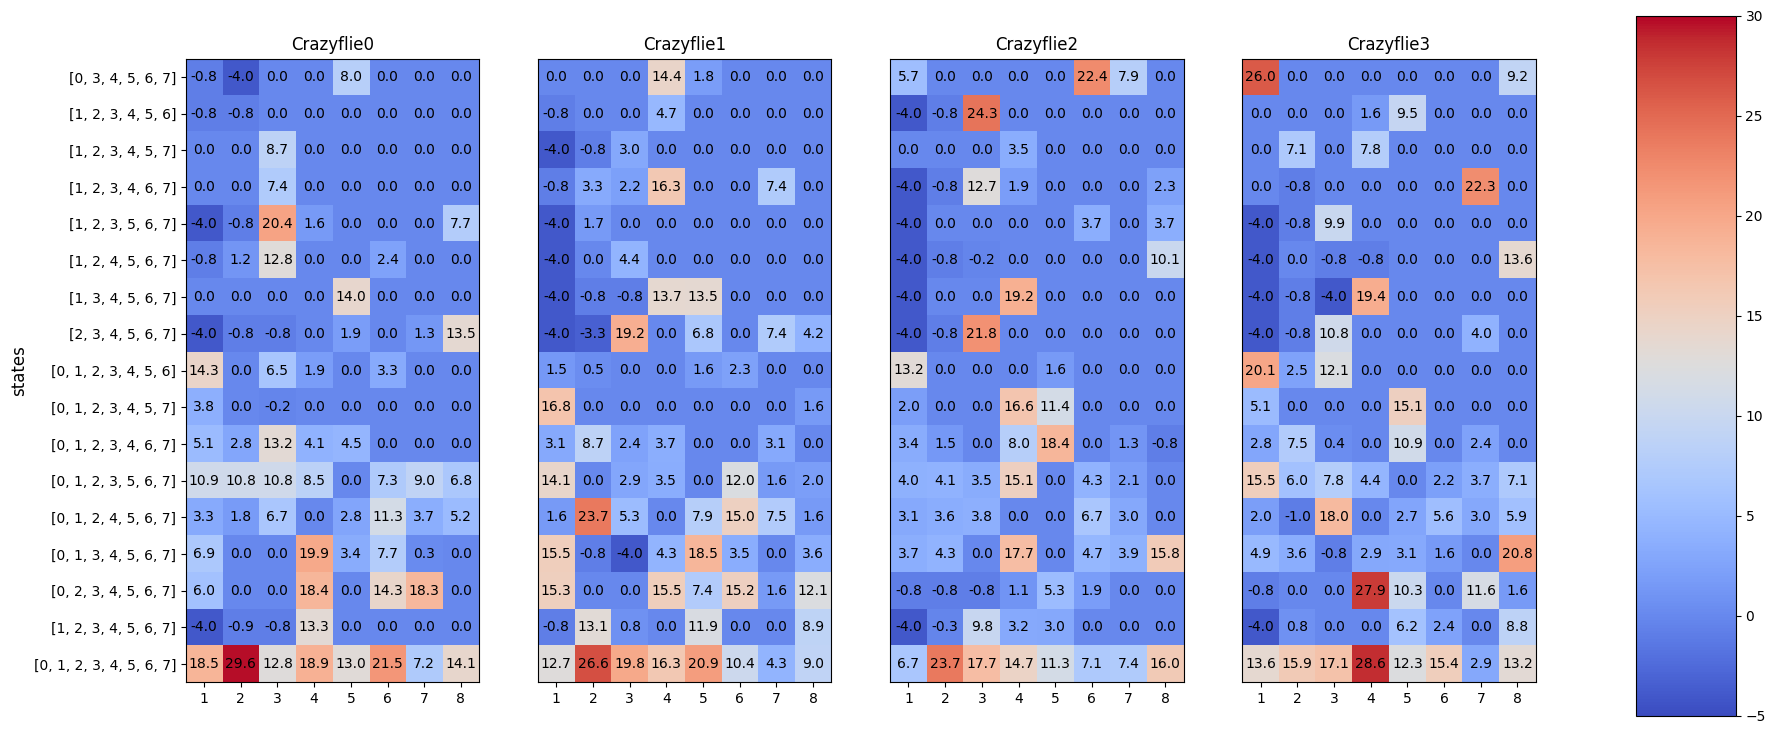

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))
for j in range(len(drones)):
    table = drones[j][:]
    t = table[-17:,:]
    # Plot the grid of Q-values

    m = axs[j].imshow(t, cmap='coolwarm', interpolation='nearest',vmin=-5, vmax=30)

    axs[j].set_title(f'Crazyflie{j}')
    axs[j].set_xticks(np.arange(8), range(1,9))
    if j == 0:
        axs[j].set_yticks(np.arange(t.shape[0]), a[-17:])
        axs[j].set_ylabel('states', fontsize=12)
    else:
        axs[j].set_yticks([])
    # Annotating the Q-values on the grid
    for x in range(t.shape[0]):
        for y in range(8):
            axs[j].text(y, x, f'{t[x, y]:.1f}', ha='center', va='center', color='black')
    

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(m, cax=cbar_ax)

plt.savefig('4LQTable.png',bbox_inches='tight', pad_inches=0)
plt.show()

## Substitute Q-Tables

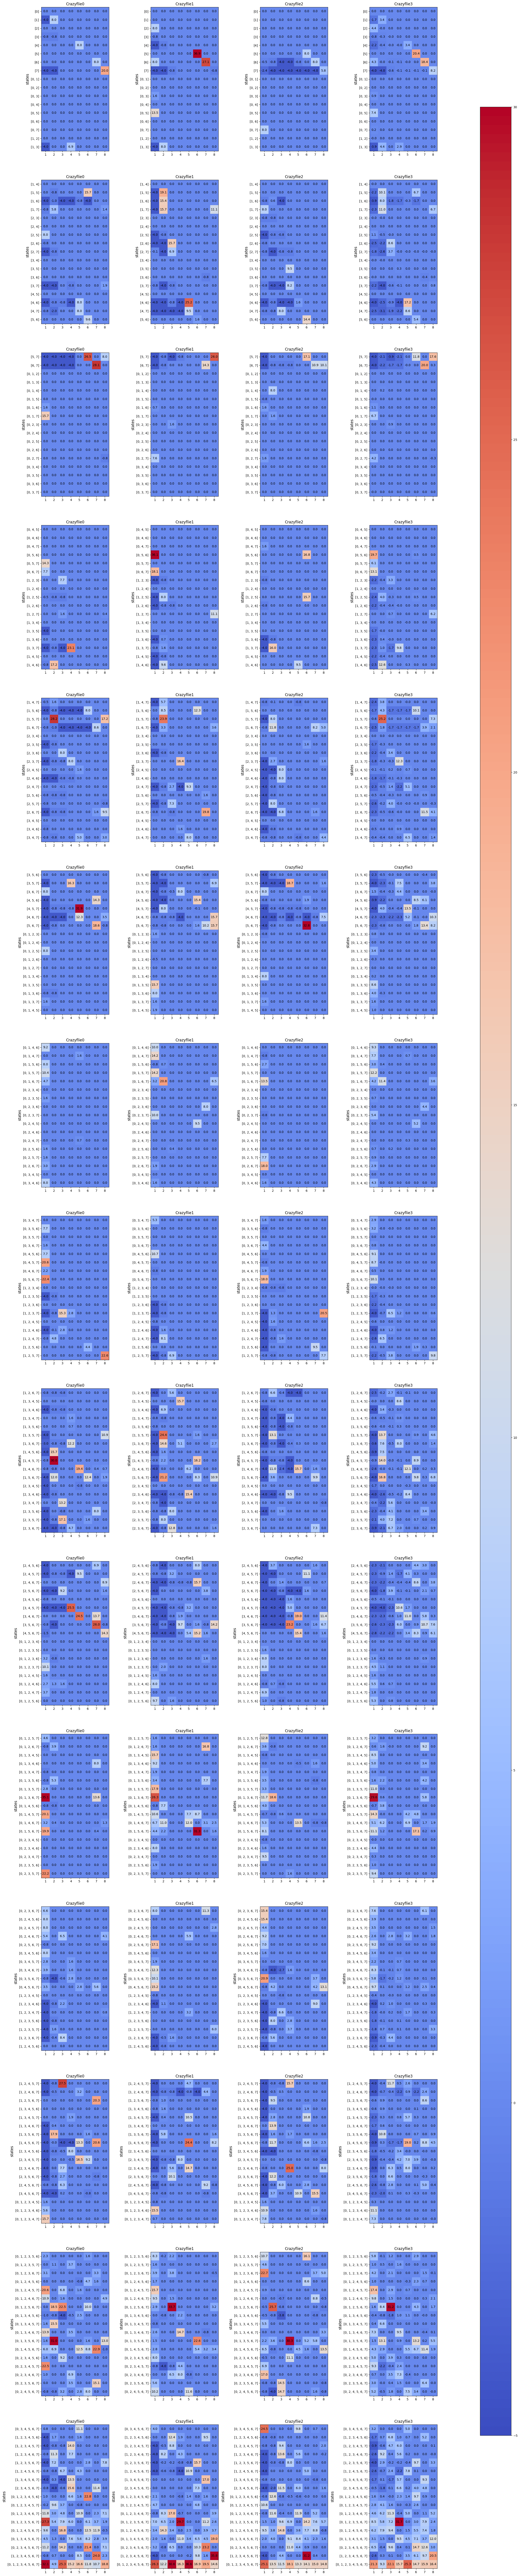

In [10]:

fig, axs = plt.subplots(15, 4, figsize=(28,150))
for j in range(len(dronesSub)):
    table = dronesSub[j][:]
    for i in range(15):
        t = table[17*i:(17*i)+17,:]
        # Plot the grid of Q-values
        
        m = axs[i,j].imshow(t, cmap='coolwarm', interpolation='nearest',vmin=-5, vmax=30)
        
        axs[i,j].set_title(f'Crazyflie{j}')
        axs[i,j].set_xticks(np.arange(8), range(1,9))
        axs[i,j].set_yticks(np.arange(t.shape[0]), a[17*i:(17*i)+17])
        axs[i,j].set_ylabel('states', fontsize=12)

        # Annotating the Q-values on the grid
        for x in range(t.shape[0]):
            for y in range(8):
                axs[i,j].text(y, x, f'{t[x, y]:.1f}', ha='center', va='center', color='black')
    

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(m, cax=cbar_ax)
plt.savefig('subQTableAll.png',bbox_inches='tight', pad_inches=0)
plt.show()



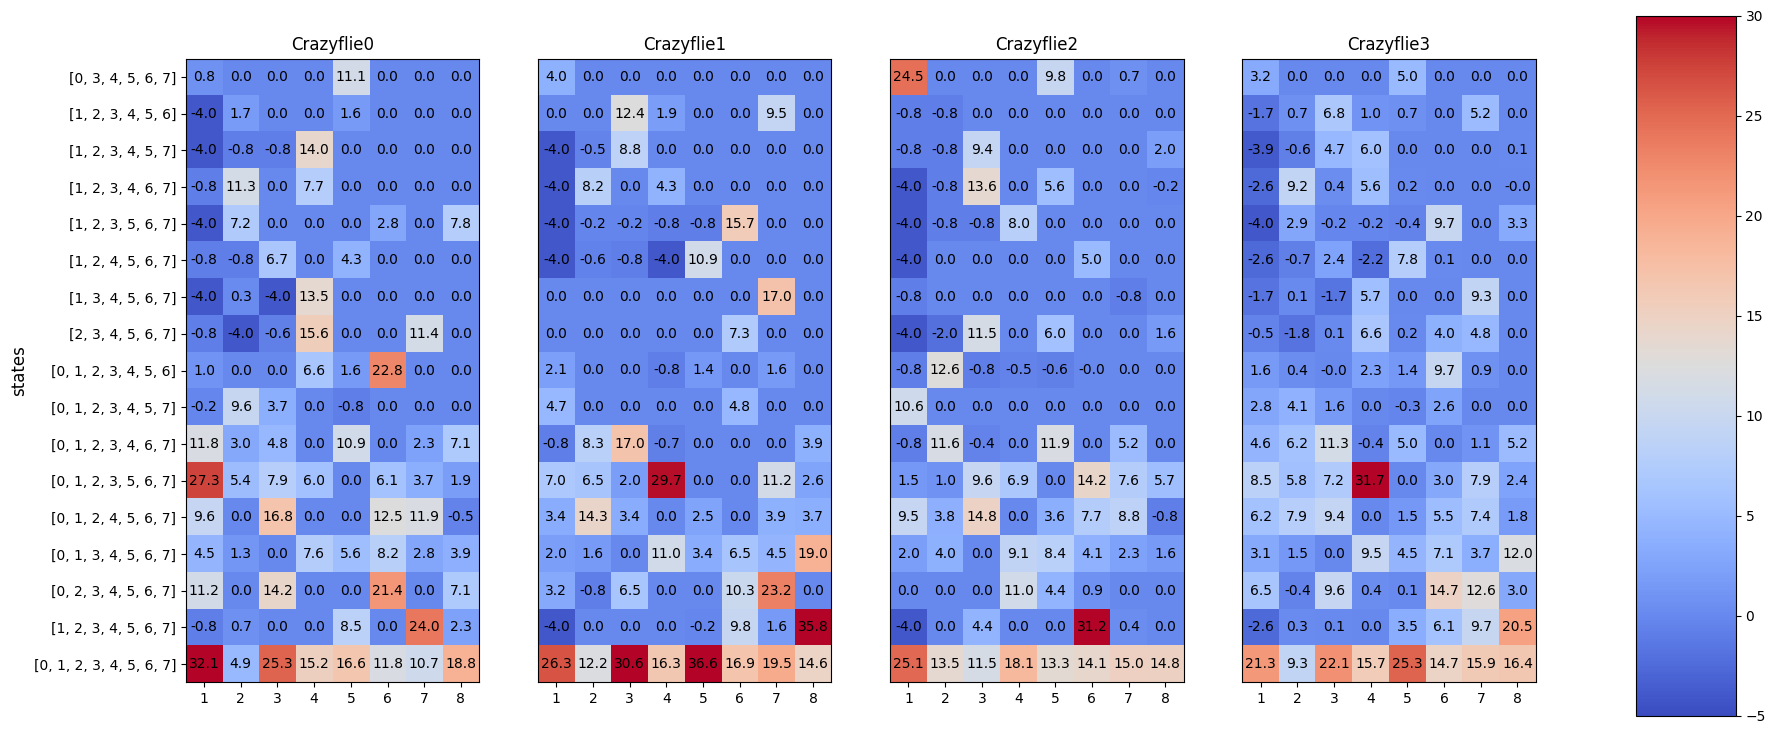

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))
for j in range(len(dronesSub)):
    table = dronesSub[j][:]
    t = table[-17:,:]
    # Plot the grid of Q-values

    m = axs[j].imshow(t, cmap='coolwarm', interpolation='nearest',vmin=-5, vmax=30)

    axs[j].set_title(f'Crazyflie{j}')
    axs[j].set_xticks(np.arange(8), range(1,9))
    if j == 0:
        axs[j].set_yticks(np.arange(t.shape[0]), a[-17:])
        axs[j].set_ylabel('states', fontsize=12)
    else:
        axs[j].set_yticks([])
    # Annotating the Q-values on the grid
    for x in range(t.shape[0]):
        for y in range(8):
            axs[j].text(y, x, f'{t[x, y]:.1f}', ha='center', va='center', color='black')
    

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(m, cax=cbar_ax)
plt.savefig('subQTable.png',bbox_inches='tight', pad_inches=0)
plt.show()

## Substitute Gaussian noise Q-Tables

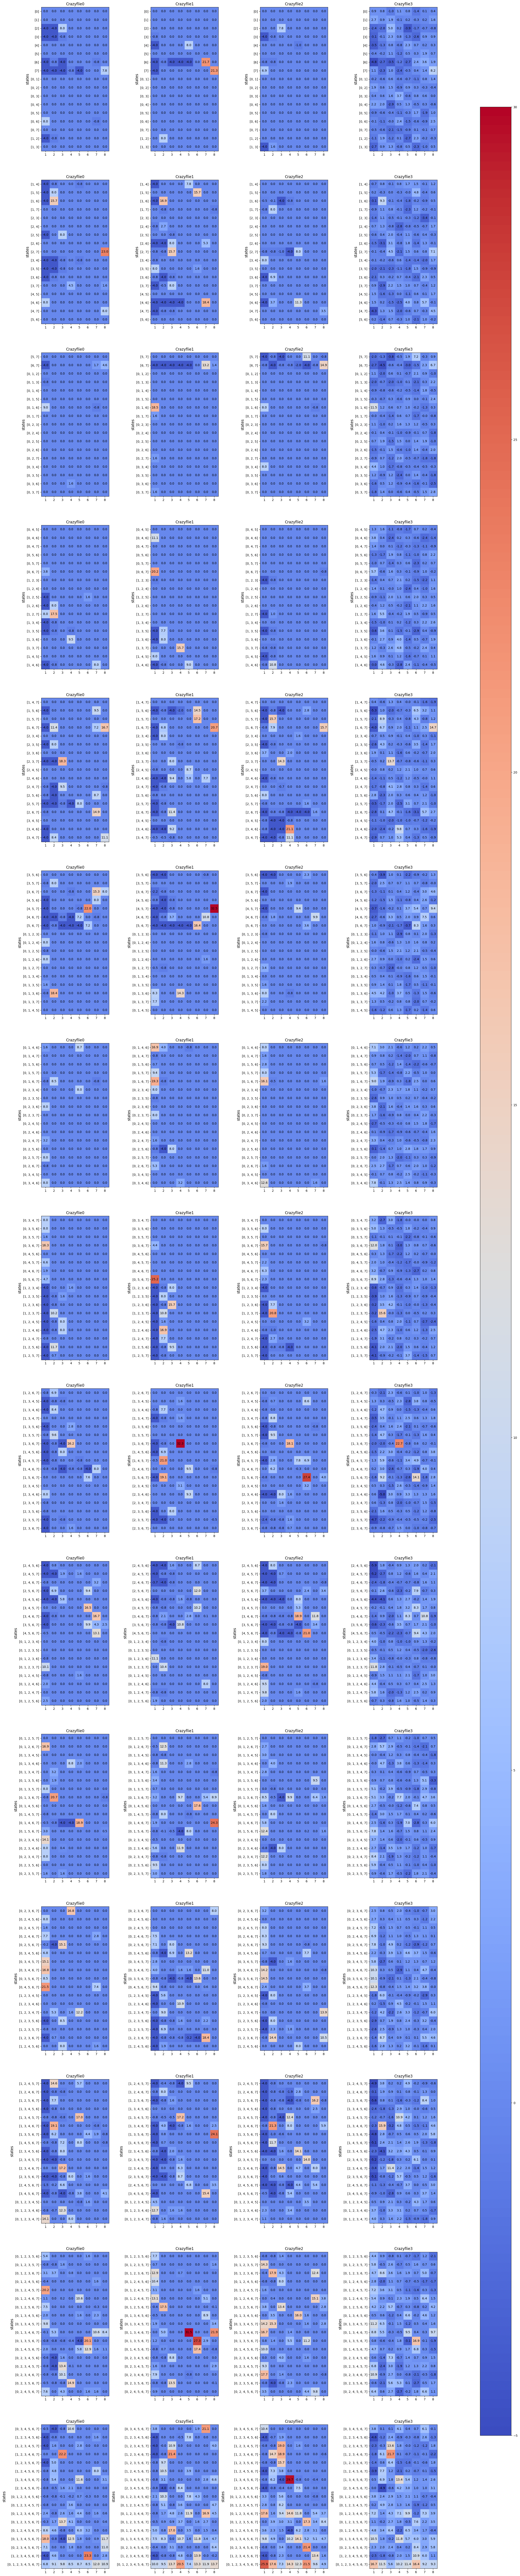

In [13]:

fig, axs = plt.subplots(15, 4, figsize=(28,150))
for j in range(len(dronesGN)):
    table = dronesGN[j][:]
    for i in range(15):
        t = table[17*i:(17*i)+17,:]
        # Plot the grid of Q-values
        
        m = axs[i,j].imshow(t, cmap='coolwarm', interpolation='nearest',vmin=-5, vmax=30)
        
        axs[i,j].set_title(f'Crazyflie{j}')
        axs[i,j].set_xticks(np.arange(8), range(1,9))
        axs[i,j].set_yticks(np.arange(t.shape[0]), a[17*i:(17*i)+17])
        axs[i,j].set_ylabel('states', fontsize=12)

        # Annotating the Q-values on the grid
        for x in range(t.shape[0]):
            for y in range(8):
                axs[i,j].text(y, x, f'{t[x, y]:.1f}', ha='center', va='center', color='black')
    

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(m, cax=cbar_ax)
plt.savefig('subGNQTableAll.png',bbox_inches='tight', pad_inches=0)
plt.show()
    

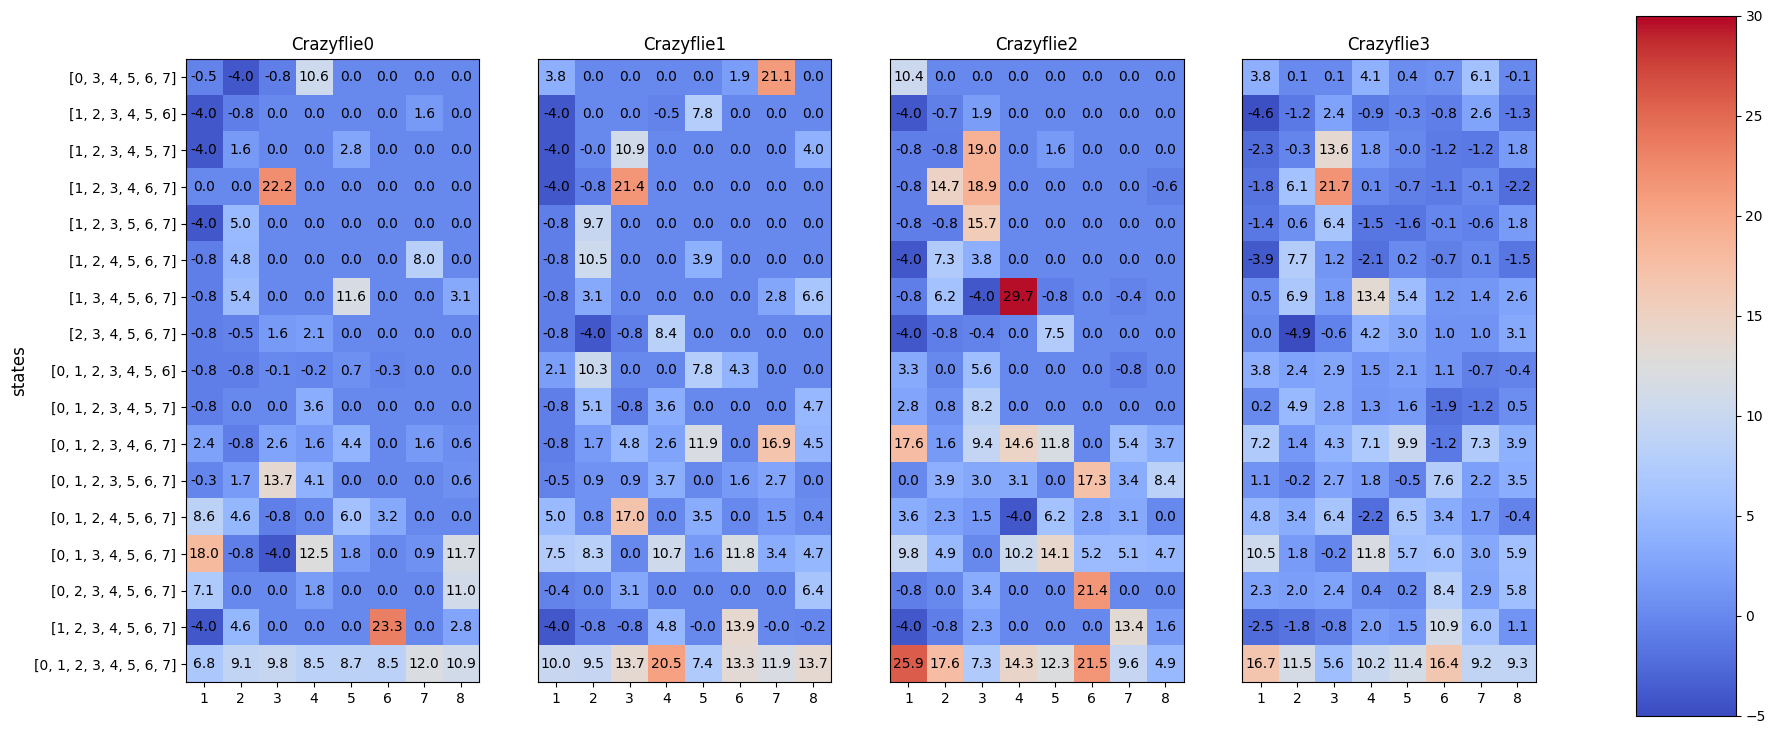

In [14]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))
for j in range(len(dronesGN)):
    table = dronesGN[j][:]
    t = table[-17:,:]
    # Plot the grid of Q-values

    m = axs[j].imshow(t, cmap='coolwarm', interpolation='nearest',vmin=-5, vmax=30)

    axs[j].set_title(f'Crazyflie{j}')
    axs[j].set_xticks(np.arange(8), range(1,9))
    if j == 0:
        axs[j].set_yticks(np.arange(t.shape[0]), a[-17:])
        axs[j].set_ylabel('states', fontsize=12)
    else:
        axs[j].set_yticks([])
    # Annotating the Q-values on the grid
    for x in range(t.shape[0]):
        for y in range(8):
            axs[j].text(y, x, f'{t[x, y]:.1f}', ha='center', va='center', color='black')
    

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(m, cax=cbar_ax)
plt.savefig('subGNQTable.png',bbox_inches='tight', pad_inches=0)
plt.show()